# Maximum likelihood Estimation Quantum State Tomography

In [1]:
import numpy as np
import qutip as qt
import cvxpy as cvx
import math as math

In [2]:
#define Pauli matrices
X=qt.sigmax()
Y=qt.sigmay()
Z=qt.sigmaz()
I=qt.qeye(2)

In [3]:
#define POVMs
Xp=0.5*(I+X)
Xm =0.5*(I-X)

Yp=0.5*(I+Y)
Ym=0.5*(I-Y)

Zp=0.5*(I+Z)
Zm=0.5*(I-Z)

In [172]:
#List of measurements
m=[I,Xp,Yp,Zp,Xm,Ym,Zm]

In [219]:
Bell=qt.bell_state('00')*qt.bell_state('00').dag()
Bell

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

(<Figure size 432x288 with 2 Axes>, <Axes3D:>)

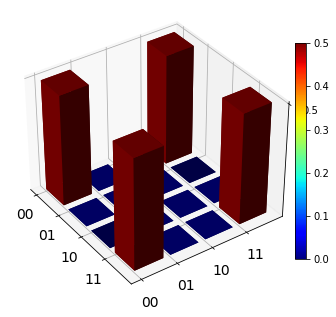

In [220]:
qt.matrix_histogram(Bell, ['00','01','10','11'],['00','01','10','11'] )

## The estimate of the true state by the MLE is obtained by maximizing the log-likelihood function (or minimizing the negative log-likelihood function):
\begin{equation}
\hat{\rho}_{\mathrm{MLE}}=\underset{\rho}{\arg \max } \sum_{k=0}^{d^2-1} \sum_{i=0}^{d-1} n_{i,k} \log \operatorname{Tr}\left(\rho \mathcal{M}_{k}\right).
\end{equation}
## where $n_{i,k}$ is the number of counts for each measurement and outcome and $\mathcal{M_i}$ are the measurement operators.

In [286]:
#define the likelihood function to be maximized

def est(rho):
    #double loop over the list of measurements for both qubits
    for i in range(0,7):
        for j in range(7):
                M=qt.tensor(m[i],m[j])
                #simulate real measurement data from 100 shots per setting
                p=np.random.binomial(100,(M*Bell).tr())
                #p=(M*Bell).tr() ideal data
                
                
                return -cvx.sum(p*(cvx.log(cvx.real(cvx.trace(rho@M.full())))))

In [ ]:
## We will use convex optimization

In [290]:
eps=0.05
rho = cvx.Variable((4,4),PSD=True)
prob = cvx.Problem(cvx.Minimize(est(rho)),[cvx.trace(rho)==1,rho-Bell.full()<<eps])
#prob.solve(solver='MOSEK')

In [291]:
result = prob.solve()
qt.Qobj(rho.value)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.47462363 0.04470281 0.04470281 0.47462363]
 [0.04470281 0.02537637 0.02537637 0.04470281]
 [0.04470281 0.02537637 0.02537637 0.04470281]
 [0.47462363 0.04470281 0.04470281 0.47462363]]

(<Figure size 432x288 with 2 Axes>, <Axes3D:>)

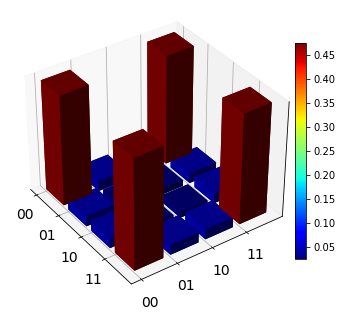

In [292]:
qt.matrix_histogram(qt.Qobj(rho.value), ['00','01','10','11'],['00','01','10','11'] )